   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


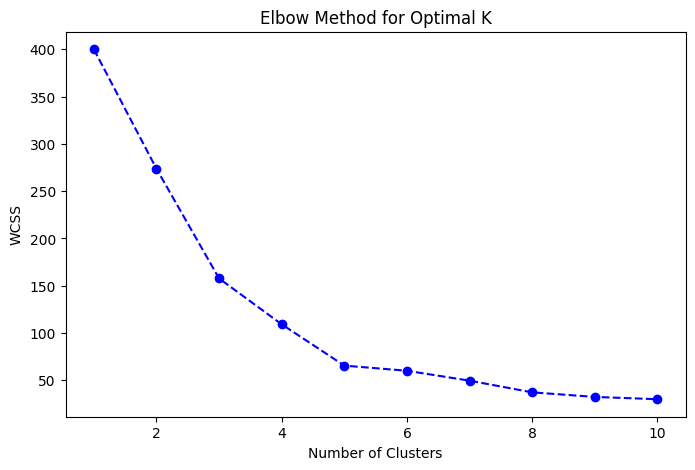

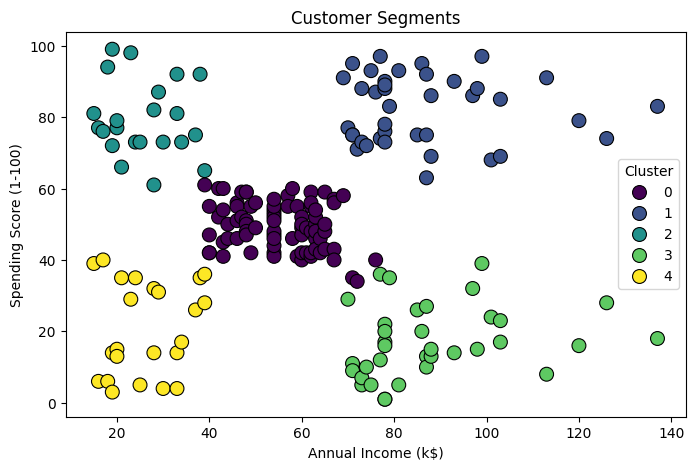

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        4
1                  15                      81        2
2                  16                       6        4
3                  16                      77        2
4                  17                      40        4


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\habee\OneDrive\Desktop\Mall_Customers.csv"  # Use 'r' to handle backslashes properly
df = pd.read_csv(file_path)


print(df.head())


print(df.isnull().sum())


df_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()  # Ensure a copy to avoid SettingWithCopyWarning


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_selected.loc[:, 'Cluster'] = kmeans.fit_predict(df_scaled)  # Using .loc to avoid warnings


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_selected['Annual Income (k$)'], y=df_selected['Spending Score (1-100)'], 
                hue=df_selected['Cluster'], palette='viridis', s=100, edgecolor='black')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()


print(df_selected.head())
